In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# load the csv file, parse dates and assign the Pre- Filing Date as the index column.
data = pd.read_csv("/Users/anushavan/Desktop/Study/\
Data_Science/Springboard/Capstone_1/data/new_buildings.csv", 
                parse_dates=['Pre- Filing Date','Fully Paid', 
                            'Approved','Fully Permitted','SIGNOFF_DATE'])

/Users/anushavan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.shape

(118461, 22)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118461 entries, 0 to 118460
Data columns (total 23 columns):
Borough                          118461 non-null object
Building Type                    118461 non-null object
Efiling Filed                    49594 non-null object
Applicant Professional Title     118456 non-null object
Professional Cert                84910 non-null object
Pre- Filing Date                 118461 non-null datetime64[ns]
Approved                         70616 non-null datetime64[ns]
Fully Permitted                  62940 non-null datetime64[ns]
Total Est. Fee                   118461 non-null float64
Proposed Zoning Sqft             118461 non-null int64
Proposed No. Of Stories          118461 non-null int64
Proposed Height                  118461 non-null int64
Proposed Dwelling Units          68282 non-null object
Proposed Occupancy               79917 non-null object
Zoning Dist1                     79917 non-null object
Zoning Dist2                     6

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118461 entries, 0 to 118460
Data columns (total 22 columns):
Borough                          118461 non-null object
Building Type                    118461 non-null object
eFiling Filed                    49594 non-null object
Applicant Professional Title     118456 non-null object
Professional Cert                84910 non-null object
Pre- Filing Date                 118461 non-null datetime64[ns]
Approved                         70616 non-null datetime64[ns]
Fully Permitted                  62940 non-null datetime64[ns]
Total Est. Fee                   118461 non-null object
Proposed Zoning Sqft             118461 non-null int64
Proposed No. of Stories          118461 non-null int64
Proposed Height                  118461 non-null int64
Proposed Dwelling Units          68282 non-null object
Proposed Occupancy               79917 non-null object
Zoning Dist1                     79917 non-null object
Zoning Dist2                     62

In [8]:
data.columns = data.columns.str.title()

In [110]:
data['Duration'] = data['Approved'] - data['Pre- Filing Date']

In [116]:
data['Duration'].describe()

count                       70616
mean     151 days 11:08:28.168120
std      246 days 17:45:11.735543
min           -168 days +00:00:00
25%              19 days 00:00:00
50%              69 days 00:00:00
75%             180 days 00:00:00
max            4960 days 00:00:00
Name: Duration, dtype: object

In [10]:
data['Total Est. Fee']= [float(c.replace('$','')) for c in data['Total Est. Fee']]

In [ ]:
pd.to_numeric(month['Proposed Dwelling Units'],errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118461 entries, 0 to 118460
Data columns (total 22 columns):
Borough                          118461 non-null object
Building Type                    118461 non-null object
Efiling Filed                    49594 non-null object
Applicant Professional Title     118456 non-null object
Professional Cert                84910 non-null object
Pre- Filing Date                 118461 non-null datetime64[ns]
Approved                         70616 non-null datetime64[ns]
Fully Permitted                  62940 non-null datetime64[ns]
Total Est. Fee                   118461 non-null float64
Proposed Zoning Sqft             118461 non-null int64
Proposed No. Of Stories          118461 non-null int64
Proposed Height                  118461 non-null int64
Proposed Dwelling Units          68282 non-null object
Proposed Occupancy               79917 non-null object
Zoning Dist1                     79917 non-null object
Zoning Dist2                     6

In [12]:
data.head(2)

,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Pre- Filing Date,Approved,Fully Permitted,Total Est. Fee,Proposed Zoning Sqft,...,Proposed Dwelling Units,Proposed Occupancy,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date
0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,NaT,243.00,2700,...,2,R-3,R3A,NaN,NaN,NaN,NaN,N,4050,NaT
1,BROOKLYN,OTHERS,Y,RA,N,2012-03-23,2013-03-14,2014-11-13,52167.26,161567,...,234,R-1,M1-2/R6,NaN,NaN,MX-8,GW,N,198951,NaT


In [50]:
month = data.set_index(['Borough','Pre- Filing Date'])
month = month.sort_index()

In [55]:
month.loc[('BRONX','2000-01-12'),'Total Est. Fee']

Borough  Pre- Filing Date
BRONX    2000-01-12          21280.19
Name: Total Est. Fee, dtype: float64

In [61]:
month.loc['BRONX':'BROOKLYN','Building Type':'Approved'].head()

Building Type Efiling Filed  \
Borough Pre- Filing Date                               
BRONX   2000-01-03              OTHERS           NaN   
        2000-01-07        1-2-3 FAMILY           NaN   
        2000-01-12              OTHERS           NaN   
        2000-01-14              OTHERS           NaN   
        2000-01-18              OTHERS           NaN   

                         Applicant Professional Title Professional Cert  \
Borough Pre- Filing Date                                                  
BRONX   2000-01-03                                 PE               NaN   
        2000-01-07                                 RA                 Y   
        2000-01-12                                 RA               NaN   
        2000-01-14                                 RA               NaN   
        2000-01-18                                 RA               NaN   

                           Approved  
Borough Pre- Filing Date             
BRONX   2000-01-03              NaT  
        2000-01-07       2001-03-01  
        2000-01-12       2000-06-12  
        2000-01-14       2005-01-06  
        2000-01-18       2001-12-05

In [99]:
month.loc[(slice(None),slice('2000-12-30','2011-01-01')),:'Approved']

Building Type Efiling Filed  \
Borough       Pre- Filing Date                               
BRONX         2001-01-02              OTHERS           NaN   
              2001-01-03              OTHERS           NaN   
              2001-01-09              OTHERS           NaN   
              2001-01-09              OTHERS           NaN   
              2001-01-09              OTHERS           NaN   
              2001-01-09        1-2-3 FAMILY           NaN   
              2001-01-09        1-2-3 FAMILY           NaN   
              2001-01-09        1-2-3 FAMILY           NaN   
              2001-01-09        1-2-3 FAMILY           NaN   
              2001-01-09        1-2-3 FAMILY           NaN   
              2001-01-09        1-2-3 FAMILY           NaN   
              2001-01-09        1-2-3 FAMILY           NaN   
              2001-01-10        1-2-3 FAMILY           NaN   
              2001-01-10        1-2-3 FAMILY           NaN   
              2001-01-12              OTHERS           NaN   
              2001-01-12              OTHERS           NaN   
              2001-01-12              OTHERS           NaN   
              2001-01-12              OTHERS           NaN   
              2001-01-16        1-2-3 FAMILY           NaN   
              2001-01-16              OTHERS           NaN   
              2001-01-17              OTHERS           NaN   
              2001-01-17              OTHERS           NaN   
              2001-01-17        1-2-3 FAMILY           NaN   
              2001-01-17              OTHERS           NaN   
              2001-01-17        1-2-3 FAMILY           NaN   
              2001-01-18        1-2-3 FAMILY           NaN   
              2001-01-19        1-2-3 FAMILY           NaN   
              2001-01-22              OTHERS           NaN   
              2001-01-24              OTHERS           NaN   
              2001-01-25        1-2-3 FAMILY           NaN   
...                                      ...           ...   
STATEN ISLAND 2010-12-07        1-2-3 FAMILY           NaN   
              2010-12-07        1-2-3 FAMILY             Y   
              2010-12-07        1-2-3 FAMILY           NaN   
              2010-12-07        1-2-3 FAMILY             Y   
              2010-12-08              OTHERS             Y   
              2010-12-08              OTHERS             Y   
              2010-12-08        1-2-3 FAMILY             Y   
              2010-12-10              OTHERS             Y   
              2010-12-10        1-2-3 FAMILY             Y   
              2010-12-10        1-2-3 FAMILY             Y   
              2010-12-13        1-2-3 FAMILY             Y   
              2010-12-15              OTHERS             Y   
              2010-12-15        1-2-3 FAMILY             Y   
              2010-12-15        1-2-3 FAMILY             Y   
              2010-12-15        1-2-3 FAMILY             Y   
              2010-12-15        1-2-3 FAMILY             Y   
              2010-12-15        1-2-3 FAMILY             Y   
              2010-12-15        1-2-3 FAMILY             Y   
              2010-12-15        1-2-3 FAMILY             Y   
              2010-12-16        1-2-3 FAMILY           NaN   
              2010-12-17        1-2-3 FAMILY             Y   
              2010-12-17        1-2-3 FAMILY             Y   
              2010-12-17        1-2-3 FAMILY             Y   
              2010-12-17        1-2-3 FAMILY             Y   
              2010-12-17        1-2-3 FAMILY             Y   
              2010-12-23        1-2-3 FAMILY           NaN   
              2010-12-23              OTHERS           NaN   
              2010-12-23              OTHERS           NaN   
              2010-12-30              OTHERS             Y   
              2010-12-30              OTHERS             Y   

                               Applicant Professional Title Professional Cert  \
Borough       Pre- Filing Date             

In [239]:
month['Total Est. Fee'][(month['Proposed Zoning Sqft'] > 1000000) & 
                 (month['Proposed No. Of Stories'] > 50)]

Pre- Filing Date
2013-12-16     248818.18
2014-05-19     210851.52
2016-12-22    1311623.55
2014-02-19     330161.52
2015-12-15     178735.80
2015-09-01     456511.64
2014-09-15     514076.52
2009-02-27     208216.84
2013-04-04     243271.18
2014-04-24     319360.44
2014-07-09    1011807.78
2016-09-29     576467.42
2017-10-12     454549.52
2014-11-05     174976.46
Name: Total Est. Fee, dtype: float64

In [100]:
data.head()

,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Pre- Filing Date,Approved,Fully Permitted,Total Est. Fee,Proposed Zoning Sqft,...,Proposed Dwelling Units,Proposed Occupancy,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date
0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,NaT,243.00,2700,...,2,R-3,R3A,NaN,NaN,NaN,NaN,N,4050,NaT
1,BROOKLYN,OTHERS,Y,RA,N,2012-03-23,2013-03-14,2014-11-13,52167.26,161567,...,234,R-1,M1-2/R6,NaN,NaN,MX-8,GW,N,198951,NaT
2,BROOKLYN,OTHERS,Y,RA,N,2018-11-05,NaT,NaT,16954.20,37676,...,55,R-2,R7A,NaN,NaN,NaN,NaN,N,37676,NaT
3,QUEENS,1-2-3 FAMILY,Y,RA,N,2013-03-05,2015-05-29,NaT,1619.08,7470,...,1,R-3,R1-2,NaN,NaN,NaN,NaN,N,12159,NaT
4,QUEENS,1-2-3 FAMILY,Y,RA,Y,2018-11-05,2019-01-31,NaT,100.00,300,...,NaN,U,R4-1,NaN,NaN,NaN,NaN,N,300,NaT


In [106]:
small = data.iloc[115000:,:10]

In [109]:
small.head(2)

,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Pre- Filing Date,Approved,Fully Permitted,Total Est. Fee,Proposed Zoning Sqft
115000,BRONX,1-2-3 FAMILY,NaN,RA,NaN,2006-01-04,2006-03-10,2006-12-28,441.94,0
115001,BRONX,1-2-3 FAMILY,NaN,RA,Y,2006-01-04,2006-01-11,2006-04-25,477.96,0


In [ ]:
pivoted = small.pivot()

In [29]:
boro = month.groupby(by=['Borough']).count()

In [36]:
boro.index = boro.index.str.title()

In [42]:
boro.columns = boro.columns.str.title()
boro.index = boro.index.str.title()

In [43]:
boro.head()

,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Approved,Fully Permitted,Total Est. Fee,Proposed Zoning Sqft,Proposed No. Of Stories,Proposed Height,Proposed Dwelling Units,Proposed Occupancy,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date
Borough,,,,,,,,,,,,,,,,,,,,
Bronx,14679,4381,14677,9699,8423,7421,14679,14679,14679,14679,8258,9425,9425,763,43,245,75,11498,14679,9481
Brooklyn,36273,17619,36271,24441,18003,15752,36273,36273,36273,36273,18785,20801,20803,2169,64,1203,425,30934,36273,20844
Manhattan,9308,5263,9308,6260,2316,1943,9308,9308,9308,9308,2355,2878,2877,511,36,511,50,6825,9308,3537
Queens,37730,15617,37730,26333,24817,22051,37730,37730,37730,37730,22313,28502,28502,2046,91,416,351,33995,37730,23504
Staten Island,20471,6714,20470,18177,17057,15773,20471,20471,20471,20471,16571,18311,18310,755,13,5349,0,19346,20471,16084


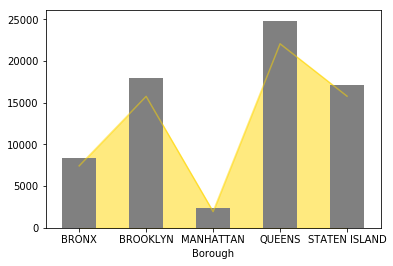

In [127]:
boro['Approved'].plot(kind='bar',color='gray')
boro['Fully Permitted'].plot(kind='area',color='gold',alpha=0.5)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118461 entries, 0 to 118460
Data columns (total 22 columns):
Borough                          118461 non-null object
Building Type                    118461 non-null object
Efiling Filed                    49594 non-null object
Applicant Professional Title     118456 non-null object
Professional Cert                84910 non-null object
Pre- Filing Date                 118461 non-null datetime64[ns]
Approved                         70616 non-null datetime64[ns]
Fully Permitted                  62940 non-null datetime64[ns]
Total Est. Fee                   118461 non-null float64
Proposed Zoning Sqft             118461 non-null int64
Proposed No. Of Stories          118461 non-null int64
Proposed Height                  118461 non-null int64
Proposed Dwelling Units          68282 non-null object
Proposed Occupancy               79917 non-null object
Zoning Dist1                     79917 non-null object
Zoning Dist2                     6

In [154]:
data.head(2)

,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Pre- Filing Date,Approved,Fully Permitted,Total Est. Fee,Proposed Zoning Sqft,...,Proposed Dwelling Units,Proposed Occupancy,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date
0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,NaT,243.00,2700,...,2,R-3,R3A,NaN,NaN,NaN,NaN,N,4050,NaT
1,BROOKLYN,OTHERS,Y,RA,N,2012-03-23,2013-03-14,2014-11-13,52167.26,161567,...,234,R-1,M1-2/R6,NaN,NaN,MX-8,GW,N,198951,NaT
